## SWAP (intercambio)

In [1]:
# Importaciones
from qiskit import QuantumCircuit #Clase para declarar circuitos
from qiskit import execute #Funcion para ejecutar circuitos cuanticos de manera simulada 
                            #o en computador cuantico real

from qiskit import Aer #Módulo donde podemos acceder al simulador qasm
from qiskit.visualization import plot_histogram, plot_bloch_vector # Función para graficar el output como diagrama de barras
%matplotlib inline
from math import sqrt, pi
import numpy as np
# Esta último llamado me permite usar la librería mat´plotlib en el Notebook

In [3]:
c = QuantumCircuit(3, 3)
estado_0 = [0,1]
estado_1 = [1/np.sqrt(2), 1/np.sqrt(2)] 
c.initialize(estado_0, 0)
c.initialize(estado_1, 1)
c.swap(0, 1)
c.swap(0, 2)
c.measure(0, 0)
c.measure(1, 1)
c.measure(2, 2)
c.draw()

┌─────────────────┐               ┌─┐   
q_0: ──────┤ initialize(0,1) ├───────X──X────┤M├───
     ┌─────┴─────────────────┴─────┐ │  │ ┌─┐└╥┘   
q_1: ┤ initialize(0.70711,0.70711) ├─X──┼─┤M├─╫────
     └─────────────────────────────┘    │ └╥┘ ║ ┌─┐
q_2: ───────────────────────────────────X──╫──╫─┤M├
                                           ║  ║ └╥┘
c_0: ══════════════════════════════════════╬══╩══╬═
                                           ║     ║ 
c_1: ══════════════════════════════════════╩═════╬═
                                                 ║ 
c_2: ════════════════════════════════════════════╩═

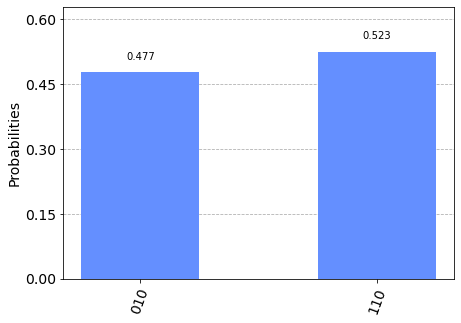

In [4]:
simulador = Aer.get_backend('qasm_simulator')
conteos = execute(c, backend = simulador, shots=1000).result().get_counts()
plot_histogram(conteos)

## Test del intercambio (para medir experimentalmente la Fidelidad)

In [5]:
cq_mas = QuantumCircuit(1, 1)
cq_menos = QuantumCircuit(1, 1)
cq_mas.h(0)
cq_mas.measure(0, 0)
cq_menos.x(0)
cq_menos.h(0)
cq_menos.measure(0, 0)

In [6]:
cq_mas.draw()

┌───┐┌─┐
q_0: ┤ H ├┤M├
     └───┘└╥┘
c_0: ══════╩═

In [7]:
cq_menos.draw()

┌───┐┌───┐┌─┐
q_0: ┤ X ├┤ H ├┤M├
     └───┘└───┘└╥┘
c_0: ═══════════╩═

In [8]:
simulador = Aer.get_backend('qasm_simulator')
conteos_mas = execute(cq_mas, backend = simulador, shots=1000).result().get_counts()
conteos_menos = execute(cq_menos, backend = simulador, shots=1000).result().get_counts()

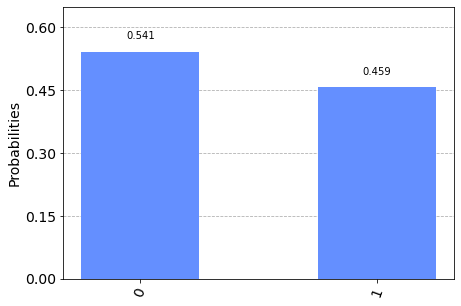

In [9]:
plot_histogram(conteos_mas)

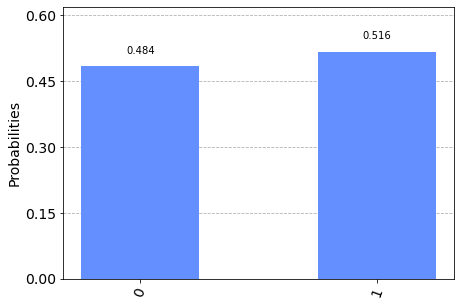

In [10]:
plot_histogram(conteos_menos)

In [11]:
def fidelidad(v1, v2):
    '''
    Esta funcion recibe 2 vectores complejos y retorna el cuadrado del modulo de su producto interno
    '''
    return np.abs(np.vdot(v1, v2))**2

In [12]:
v_mas = np.array([[1/np.sqrt(2)],[1/np.sqrt(2)]])
v_menos = np.array([[1/np.sqrt(2)],[-1/np.sqrt(2)]])
fidelidad(v_mas, v_mas)

0.9999999999999996

In [18]:
cqtest = QuantumCircuit(3, 1)
cqtest.h(0)
cqtest.initialize([ev_norm[0][0], ev_norm[1][0]],1)
cqtest.barrier()
cqtest.h(2)
cqtest.cswap(2, 1, 0)
cqtest.h(2)
cqtest.measure(2, 0)
cqtest.draw()

┌───┐                        ░                 
q_0: ───────────────────────┤ H ├────────────────────────░───────X─────────
     ┌──────────────────────┴───┴──────────────────────┐ ░       │         
q_1: ┤ initialize(0.53666+-0.35777j,-0.26833+0.71554j) ├─░───────X─────────
     └─────────────────────────────────────────────────┘ ░ ┌───┐ │ ┌───┐┌─┐
q_2: ────────────────────────────────────────────────────░─┤ H ├─■─┤ H ├┤M├
                                                         ░ └───┘   └───┘└╥┘
c_0: ════════════════════════════════════════════════════════════════════╩═

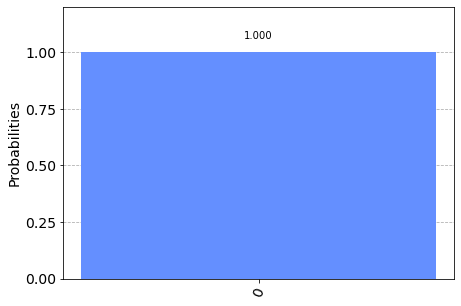

In [14]:
conteos_test = execute(cqtest, backend = simulador, shots=1000).result().get_counts()
plot_histogram(conteos_test)

In [15]:
estado_variable = np.array([[3 - 2j],[-1.5 + 4j]])
norma = np.linalg.norm(estado_variable)
ev_norm = 1/norma * estado_variable

In [16]:
ev_norm

array([[ 0.53665631-0.35777088j],
       [-0.26832816+0.71554175j]])

In [17]:
fidelidad(v_mas, ev_norm)

0.09999999999999996